In [6]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Load the data into a dataframe
accidents=pd.read_csv("road.csv")
accidents.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3.0,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,01:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,01:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,NaN,NaN,NaN,NaN,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,NaN,Unknown,NaN,NaN,NaN,NaN,...,U-Turn,Driver or rider,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,...,Moving Backward,Driver or rider,Female,18-30,3.0,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,NaN,NaN,NaN,NaN,NaN,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3.0,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [8]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         12316 non-null  object 
 1   Day_of_week                  12316 non-null  object 
 2   Age_band_of_driver           12316 non-null  object 
 3   Sex_of_driver                12316 non-null  object 
 4   Educational_level            11575 non-null  object 
 5   Vehicle_driver_relation      11737 non-null  object 
 6   Driving_experience           11487 non-null  object 
 7   Type_of_vehicle              11366 non-null  object 
 8   Owner_of_vehicle             11834 non-null  object 
 9   Service_year_of_vehicle      8388 non-null   object 
 10  Defect_of_vehicle            7889 non-null   object 
 11  Area_accident_occured        12077 non-null  object 
 12  Lanes_or_Medians             11931 non-null  object 
 13  Road_allignment 

In [9]:
missing_values_count = accidents.isnull().sum()
missing_values_count

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                 4443
Sex_of_casualty                4443
Age_band_of_casualty           4443
Casualty_severity              4443
Work_of_casuality           

In [10]:
accidents['Defect_of_vehicle']=accidents['Defect_of_vehicle'].fillna('No defect')
accidents['Service_year_of_vehicle']=accidents['Service_year_of_vehicle'].fillna('Unknown')
accidents['Work_of_casuality']=accidents['Work_of_casuality'].fillna('Driver')
accidents['Fitness_of_casuality']=accidents['Fitness_of_casuality'].fillna('Normal')
accidents['Educational_level']=accidents['Educational_level'].fillna('Junior high school')
accidents['Driving_experience']=accidents['Driving_experience'].fillna('5-10yr')
accidents['Type_of_vehicle']=accidents['Type_of_vehicle'].fillna('Automobile')
accidents['Types_of_Junction']=accidents['Types_of_Junction'].fillna('Y Shape')
accidents['Vehicle_driver_relation']=accidents['Vehicle_driver_relation'].fillna('Employee')
accidents['Type_of_collision']=accidents['Type_of_collision'].fillna('Vehicle with vehicle collision')
accidents['Area_accident_occured']=accidents['Area_accident_occured'].fillna('Other')
accidents['Owner_of_vehicle']=accidents['Owner_of_vehicle'].fillna('Owner')
accidents['Lanes_or_Medians']=accidents['Lanes_or_Medians'].fillna('Two-way (divided with broken lines road marking)')
accidents['Road_allignment']=accidents['Road_allignment'].fillna('Tangent road with flat terrain')
accidents['Road_surface_type']=accidents['Road_surface_type'].fillna('Asphalt roads')
accidents['Vehicle_movement']=accidents['Vehicle_movement'].fillna('Going straight')
accidents['Casualty_class']=accidents['Casualty_class'].fillna('Driver or rider')
accidents['Sex_of_casualty']=accidents['Sex_of_casualty'].fillna('Male')
accidents['Age_band_of_casualty']=accidents['Age_band_of_casualty'].fillna('18-30')
accidents['Casualty_severity']=accidents['Casualty_severity'].fillna('3.0')

In [11]:
accidents.isnull().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_a

In [12]:
# convert object type column into datetime datatype column
df = accidents.copy()
df['Time'] = pd.to_datetime(df['Time'])

In [13]:
# Extrating 'Hour_of_Day' feature from the Time column
new_df=df.copy()
new_df['Hour_of_Day'] = new_df['Time'].dt.hour
n_df = new_df.drop('Time', axis=1)
n_df.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour_of_Day
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Driver or rider,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Driver or rider,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,17
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Driver or rider,Male,31-50,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,17
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Pedestrian,Female,18-30,3.0,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Driver or rider,Male,18-30,3.0,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury,1


In [14]:
n_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Owner_of_vehicle             12316 non-null  object
 8   Service_year_of_vehicle      12316 non-null  object
 9   Defect_of_vehicle            12316 non-null  object
 10  Area_accident_occured        12316 non-null  object
 11  Lanes_or_Medians             12316 non-null  object
 12  Road_allignment              12316 non-null  object
 13  Types_of_Junction            12

In [15]:
drop_features=['Owner_of_vehicle',  'Defect_of_vehicle', 'Lanes_or_Medians','Road_allignment', 
'Road_surface_type','Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
'Vehicle_movement', 'Casualty_class',  'Casualty_severity', 'Work_of_casuality', 
'Fitness_of_casuality', 'Pedestrian_movement','Accident_severity']

In [16]:
feature_df=n_df.drop(drop_features,axis=1)

In [17]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12316 non-null  object
 1   Age_band_of_driver           12316 non-null  object
 2   Sex_of_driver                12316 non-null  object
 3   Educational_level            12316 non-null  object
 4   Vehicle_driver_relation      12316 non-null  object
 5   Driving_experience           12316 non-null  object
 6   Type_of_vehicle              12316 non-null  object
 7   Service_year_of_vehicle      12316 non-null  object
 8   Area_accident_occured        12316 non-null  object
 9   Types_of_Junction            12316 non-null  object
 10  Type_of_collision            12316 non-null  object
 11  Number_of_vehicles_involved  12316 non-null  int64 
 12  Number_of_casualties         12316 non-null  int64 
 13  Sex_of_casualty              12

In [18]:
# Categorical features to encode using one hot encoding 
features=['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Service_year_of_vehicle', 'Area_accident_occured',
       'Types_of_Junction', 'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Sex_of_casualty', 'Age_band_of_casualty',
       'Cause_of_accident', 'Hour_of_Day']


# setting input features X and target y 
X = feature_df[features]  # here features are selected from 'object' datatype
y = n_df['Accident_severity']


In [19]:
# we will use pandas get_dummies method for on-hot encoding
encoded_df = pd.get_dummies(X, drop_first=True)
encoded_df.shape

(12316, 104)

In [20]:
encoded_df.head(10)

,Number_of_vehicles_involved,Number_of_casualties,Hour_of_Day,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Age_band_of_driver_31-50,...,Cause_of_accident_No distancing,Cause_of_accident_No priority to pedestrian,Cause_of_accident_No priority to vehicle,Cause_of_accident_Other,Cause_of_accident_Overloading,Cause_of_accident_Overspeed,Cause_of_accident_Overtaking,Cause_of_accident_Overturning,Cause_of_accident_Turnover,Cause_of_accident_Unknown
0,2,2,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,17,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2,2,17,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,2,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,1,1,14,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
6,1,1,17,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
7,2,1,17,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8,2,1,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,1,17,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# import labelencoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder

# create labelencoder object
lb = LabelEncoder()
lb.fit(y)
y_encoded = lb.transform(y)
print("Encoded labels:",lb.classes_)
y_en = pd.Series(y_encoded)


Encoded labels: ['Fatal injury' 'Serious Injury' 'Slight Injury']


In [22]:
# feature seleciton method using chi2 for categorical output, categorical input
from sklearn.feature_selection import SelectKBest, chi2
fs = SelectKBest(chi2, k=50)
X_new = fs.fit_transform(encoded_df, y_en)

# Take the selected features
cols = fs.get_feature_names_out()

# convert selected features into dataframe
fs_df = pd.DataFrame(X_new, columns=cols)

In [23]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
# importing the SMOTENC object from imblearn library 
from imblearn.over_sampling import SMOTENC

# categorical features for SMOTENC technique for categorical features
n_cat_index = np.array(range(3,50))

# creating smote object with SMOTENC class
smote = SMOTENC(categorical_features=n_cat_index, random_state=42, n_jobs=True)
X_n, y_n = smote.fit_resample(fs_df,y_en)

# print the shape of new upsampled dataset
X_n.shape, y_n.shape

((31245, 50), (31245,))

In [25]:
# print the target classes distribution
print(y_n.value_counts())

2    10415
1    10415
0    10415
dtype: int64


## MODEL BUILDING

## 1. RANDOM FOREST CLASSIFIER

In [26]:
# import the necessary liabrary
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [27]:
# train and test split and building baseline model to predict target features
x_train,x_test,y_train,y_test = train_test_split(X_n, y_n, test_size=0.2, random_state=42)

In [28]:
# modelling using random forest baseline
rf = RandomForestClassifier(n_estimators=800, max_depth=20, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=800, random_state=42)

In [29]:
y_pred_rfc_train=rf.predict(x_train)

In [30]:
cl=classification_report(y_train, y_pred_rfc_train)
print(cl)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      8330
           1       1.00      0.85      0.92      8315
           2       0.86      1.00      0.93      8351

    accuracy                           0.95     24996
   macro avg       0.95      0.95      0.95     24996
weighted avg       0.95      0.95      0.95     24996



In [31]:
# predicting on test data
y_pred_rfc_test = rf.predict(x_test)

# train score 
rf.score(x_train, y_train)

0.9466714674347896

In [32]:
cl=classification_report(y_test,y_pred_rfc_test)
print(cl)

              precision    recall  f1-score   support

           0       0.76      0.62      0.68      2085
           1       0.63      0.63      0.63      2100
           2       0.84      1.00      0.91      2064

    accuracy                           0.75      6249
   macro avg       0.74      0.75      0.74      6249
weighted avg       0.74      0.75      0.74      6249



# Naive bayes

In [33]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb_model= GaussianNB()
gnb_model.fit(x_train, y_train)

GaussianNB()

## training accuracy

In [34]:
y_pred_gnb_train=gnb_model.predict(x_train)

In [35]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_gnb_train))
print("==============================================================================")
print("Confusion Matrics",confusion_matrix(y_train,y_pred_gnb_train))
print("==============================================================================")
print(classification_report(y_train,y_pred_gnb_train))

Accuracy of training model 0.6834293486957913
Confusion Matrics [[5769 2441  120]
 [3709 3304 1302]
 [   3  338 8010]]
              precision    recall  f1-score   support

           0       0.61      0.69      0.65      8330
           1       0.54      0.40      0.46      8315
           2       0.85      0.96      0.90      8351

    accuracy                           0.68     24996
   macro avg       0.67      0.68      0.67     24996
weighted avg       0.67      0.68      0.67     24996



## testing accuracy

In [36]:
y_pred_gnb_test = gnb_model.predict(x_test)

In [37]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_gnb_test))
print("==============================================================================")
print(confusion_matrix(y_test,y_pred_gnb_test))
print("==============================================================================")
print(classification_report(y_test,y_pred_gnb_test))

Accuracy of testing model 0.6765882541206593
[[1427  630   28]
 [ 913  826  361]
 [   0   89 1975]]
              precision    recall  f1-score   support

           0       0.61      0.68      0.64      2085
           1       0.53      0.39      0.45      2100
           2       0.84      0.96      0.89      2064

    accuracy                           0.68      6249
   macro avg       0.66      0.68      0.66      6249
weighted avg       0.66      0.68      0.66      6249



##  SUPPORT VECTOR MACHINE

In [38]:
from sklearn.svm import SVC
# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(x_train, y_train)

SVC(C=0.1, gamma=1, kernel='linear')

## training accuracy

In [39]:
y_pred_svc_train=svc_model.predict(x_train)

In [40]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_svc_train))
print("==============================================================================")
print(confusion_matrix(y_train,y_pred_svc_train))
print("==============================================================================")
print(classification_report(y_train,y_pred_svc_train))

Accuracy of training model 0.7213554168666987
[[5132 3068  130]
 [2402 4548 1365]
 [   0    0 8351]]
              precision    recall  f1-score   support

           0       0.68      0.62      0.65      8330
           1       0.60      0.55      0.57      8315
           2       0.85      1.00      0.92      8351

    accuracy                           0.72     24996
   macro avg       0.71      0.72      0.71     24996
weighted avg       0.71      0.72      0.71     24996



## test accuracy

In [41]:
y_pred_svc_test = svc_model.predict(x_test)

In [42]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_svc_test))
print("==============================================================================")
print(confusion_matrix(y_test,y_pred_svc_test))
print("==============================================================================")
print(classification_report(y_test,y_pred_svc_test))

Accuracy of testing model 0.7117938870219235
[[1276  781   28]
 [ 614 1108  378]
 [   0    0 2064]]
              precision    recall  f1-score   support

           0       0.68      0.61      0.64      2085
           1       0.59      0.53      0.56      2100
           2       0.84      1.00      0.91      2064

    accuracy                           0.71      6249
   macro avg       0.70      0.71      0.70      6249
weighted avg       0.70      0.71      0.70      6249



## . DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc_model=DecisionTreeClassifier(criterion = 'entropy')
dtc_model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

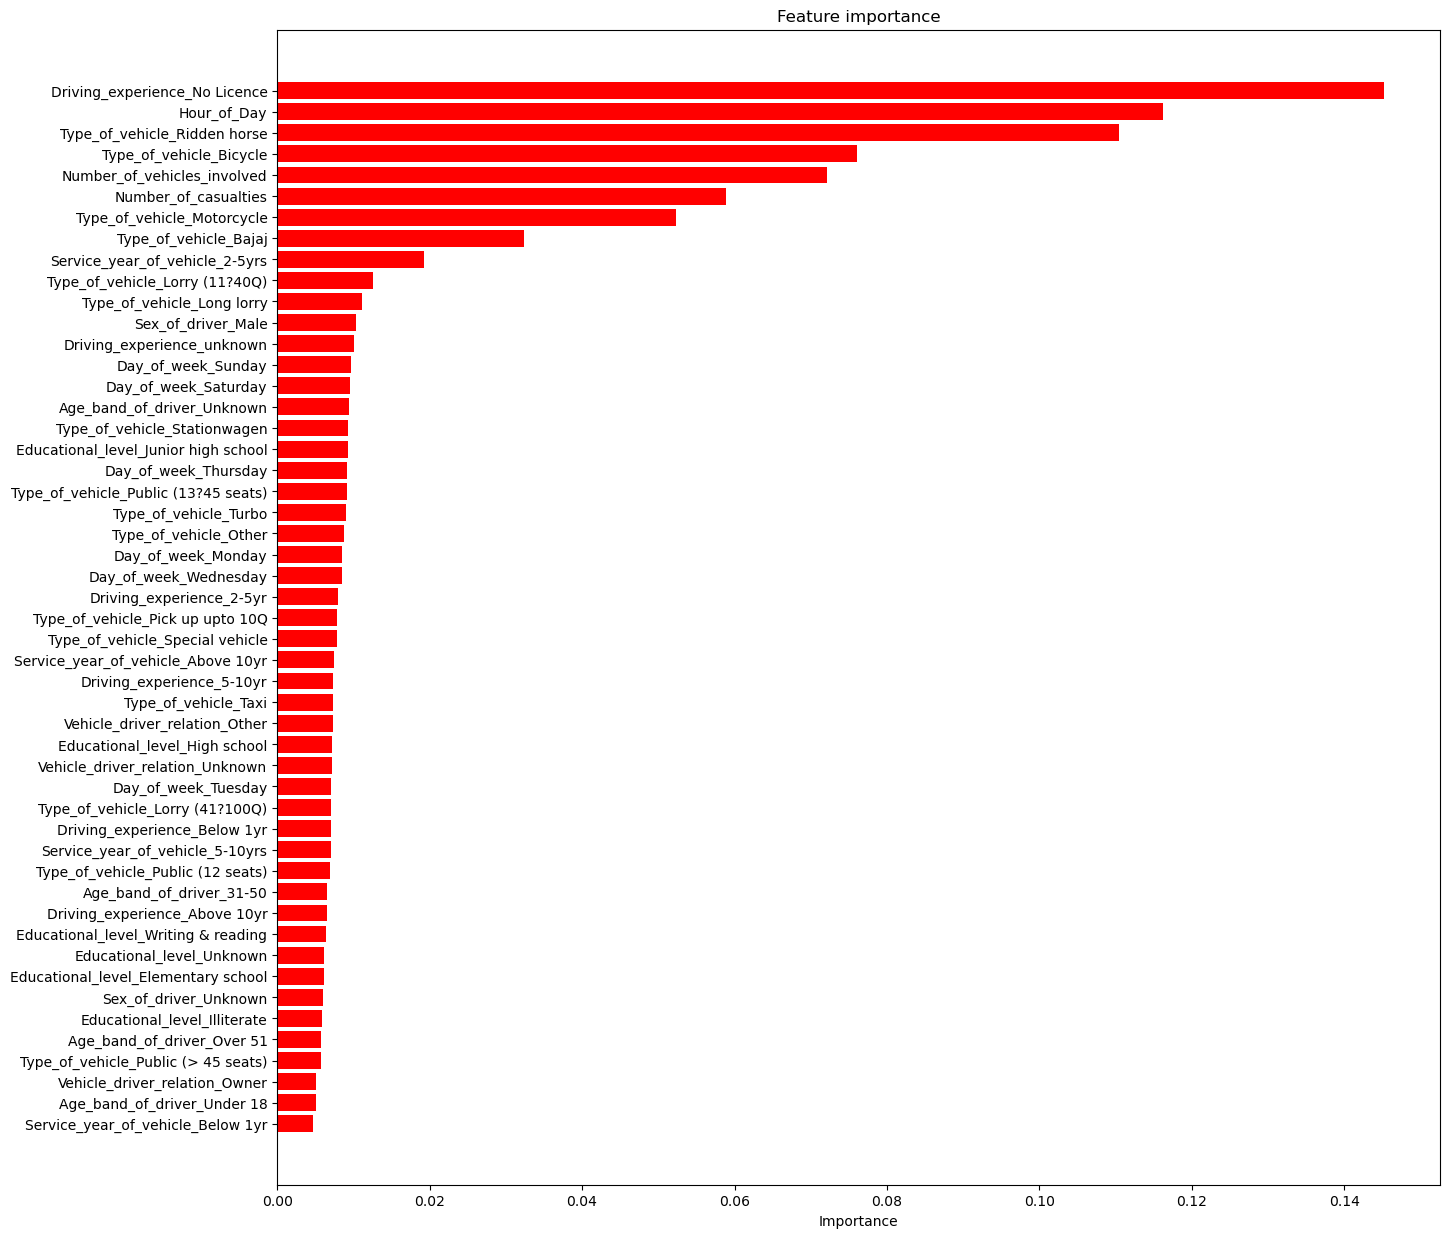

In [63]:
features_list = encoded_df.columns.values
feature_importance = dtc_model.feature_importances_
sorted_idx = np.argsort(feature_importance)

plt.figure(figsize=(15,15))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center', color ="red")
plt.yticks(range(len(sorted_idx)), features_list[sorted_idx])
plt.xlabel('Importance')
plt.title('Feature importance')
plt.draw()
#plt.savefig("featureimp.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

### training accuracy

In [44]:
y_pred_dtc_train = dtc_model.predict(x_train)

In [45]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_dtc_train))
print("==============================================================================")
print(confusion_matrix(y_train,y_pred_dtc_train))
print("==============================================================================")
print(classification_report(y_train,y_pred_dtc_train))

Accuracy of training model 0.9968795007201152
[[8330    0    0]
 [   1 8294   20]
 [   5   52 8294]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8330
           1       0.99      1.00      1.00      8315
           2       1.00      0.99      1.00      8351

    accuracy                           1.00     24996
   macro avg       1.00      1.00      1.00     24996
weighted avg       1.00      1.00      1.00     24996



## testing accuracy

In [46]:
y_pred_dtc_test = dtc_model.predict(x_test)

In [47]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_dtc_test))
print("==============================================================================")
print(confusion_matrix(y_test,y_pred_dtc_test))
print("==============================================================================")
print(classification_report(y_test,y_pred_dtc_test))

Accuracy of testing model 0.738038086093775
[[1539  523   23]
 [ 498 1312  290]
 [  21  282 1761]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      2085
           1       0.62      0.62      0.62      2100
           2       0.85      0.85      0.85      2064

    accuracy                           0.74      6249
   macro avg       0.74      0.74      0.74      6249
weighted avg       0.74      0.74      0.74      6249



## KNN

In [48]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

## training accuracy

In [49]:
y_pred_knn_train = knn_model.predict(x_train)

In [50]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_knn_train))
print("==============================================================================")
print(confusion_matrix(y_train,y_pred_knn_train))
print("==============================================================================")
print(classification_report(y_train,y_pred_knn_train))

Accuracy of training model 0.8562570011201792
[[7193  983  154]
 [1366 6040  909]
 [  23  158 8170]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      8330
           1       0.84      0.73      0.78      8315
           2       0.88      0.98      0.93      8351

    accuracy                           0.86     24996
   macro avg       0.85      0.86      0.85     24996
weighted avg       0.85      0.86      0.85     24996



In [51]:
y_pred_knn_test = knn_model.predict(x_test)

In [52]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_knn_test))
print("==============================================================================")
print(confusion_matrix(y_test,y_pred_knn_test))
print("==============================================================================")
print(classification_report(y_test,y_pred_knn_test))

Accuracy of testing model 0.7177148343734998
[[1478  541   66]
 [ 667 1045  388]
 [  13   89 1962]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.70      2085
           1       0.62      0.50      0.55      2100
           2       0.81      0.95      0.88      2064

    accuracy                           0.72      6249
   macro avg       0.71      0.72      0.71      6249
weighted avg       0.71      0.72      0.71      6249



# 8. GradientBoostingClassifier

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
gbc_model = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                                       learning_rate=0.1, loss='deviance', max_depth=3,
                                       max_features=None, max_leaf_nodes=None,
                                       min_impurity_decrease=0.0,
                                       min_samples_leaf=1, min_samples_split=2,
                                       min_weight_fraction_leaf=0.0, n_estimators=100,
                                       n_iter_no_change=None,
                                       random_state=2903, subsample=1.0, tol=0.0001,
                                       validation_fraction=0.1, verbose=0,
                                       warm_start=False)
gbc_model.fit(x_train,y_train)

GradientBoostingClassifier(random_state=2903)

In [54]:
classifiergb = GradientBoostingClassifier(random_state=2903)

### training accuracy

In [55]:
y_pred_gbc_train= gbc_model.predict(x_train)

In [56]:
print("Accuracy of training model",accuracy_score(y_train,y_pred_gbc_train))
print("==============================================================================")
print(confusion_matrix(y_train,y_pred_gbc_train))
print("==============================================================================")
print(classification_report(y_train,y_pred_gbc_train))

Accuracy of training model 0.8241718674987998
[[6416 1785  129]
 [1150 5848 1317]
 [   0   14 8337]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      8330
           1       0.76      0.70      0.73      8315
           2       0.85      1.00      0.92      8351

    accuracy                           0.82     24996
   macro avg       0.82      0.82      0.82     24996
weighted avg       0.82      0.82      0.82     24996



### testing accuracy

In [57]:
y_pred_gbc_test= gbc_model.predict(x_test)

In [58]:
print("Accuracy of testing model",accuracy_score(y_test,y_pred_gbc_test))
print("==============================================================================")
print(confusion_matrix(y_test,y_pred_gbc_test))
print("==============================================================================")
print(classification_report(y_test,y_pred_gbc_test))

Accuracy of testing model 0.8033285325652104
[[1545  512   28]
 [ 318 1415  367]
 [   0    4 2060]]
              precision    recall  f1-score   support

           0       0.83      0.74      0.78      2085
           1       0.73      0.67      0.70      2100
           2       0.84      1.00      0.91      2064

    accuracy                           0.80      6249
   macro avg       0.80      0.80      0.80      6249
weighted avg       0.80      0.80      0.80      6249



## Accuracy comparision

In [59]:
model = ['RANDOM FOREST','GAUSSIAN NAIVE BAYES CLASSIFIER','SVC','DECISION TREE','KNN','GradientBoostingClassifier']

training = [
     (accuracy_score(y_train,y_pred_rfc_train)*100),   
     (accuracy_score(y_train,y_pred_gnb_train)*100),
     (accuracy_score(y_train,y_pred_svc_train)*100),
     (accuracy_score(y_train,y_pred_dtc_train)*100),
     (accuracy_score(y_train,y_pred_knn_train)*100),
     (accuracy_score(y_train,y_pred_gbc_train)*100)
]

testing = [
     (accuracy_score(y_test,y_pred_rfc_test)*100),
     (accuracy_score(y_test,y_pred_gnb_test)*100),
     (accuracy_score(y_test,y_pred_svc_test)*100),
     (accuracy_score(y_test,y_pred_dtc_test)*100),
     (accuracy_score(y_test,y_pred_knn_test)*100),
     (accuracy_score(y_test,y_pred_gbc_test)*100)
]

In [60]:
df = pd.DataFrame()
df['Model'] = model
df['Training'] = training
df['Testing'] = testing
df

,Model,Training,Testing
0,RANDOM FOREST,94.667147,74.939990
1,GAUSSIAN NAIVE BAYES CLASSIFIER,68.342935,67.658825
2,SVC,72.135542,71.179389
3,DECISION TREE,99.687950,73.803809
4,KNN,85.625700,71.771483
5,GradientBoostingClassifier,82.417187,80.332853
